In [32]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

amazon_df = pd.read_csv('../../data/amazon_sorted/most_populair_products.csv')
amazon_df = amazon_df.drop(columns='index').dropna().reset_index()
product_df = amazon_df[amazon_df['product_id'] == amazon_df.iloc[0]['product_id']]

sia = SentimentIntensityAnalyzer()

reviews = product_df['review_body']
sents = reviews.apply(sia.polarity_scores)
sents = sents.apply(lambda x: x.get('compound'))

product_df['sentiment'] = sents
product_df = product_df.sort_values(by=['sentiment'])
reviews = product_df['review_body']

C:\Users\Eric_\AppData\Local\Temp\ipykernel_19572\656437955.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['sentiment'] = sents


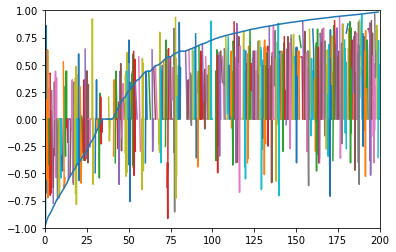

In [55]:
sample_size = 200
step_size = len(reviews)//sample_size
plt.axis([0, sample_size, -1, 1])
rev_compounds = list()
for index, review in enumerate(reviews[:step_size*sample_size:step_size]):
    rev_compounds.append(sia.polarity_scores(review)['compound'])
    sentences = review.split('.')
    sen_compounds = list()
    for sentence in sentences:
        sen_compounds.append(sia.polarity_scores(sentence)['compound'])
    plt.plot(np.linspace(index, index+1, len(sentences)), sen_compounds)
plt.plot(range(sample_size), rev_compounds)
plt.show()
